In [1]:
%matplotlib inline
import pandas as pd
import os
os.chdir('/Users/michaelcaruana/Desktop/pycon-pandas-tutorial')

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Fuera de la ley,1937
1,Element,2016
2,Jeomjaengyideul,2012
3,An kubo sa kawayanan,2015
4,Hirer Angti,1992


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [12]:
common_titles = titles.title.value_counts()
common_titles.head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Anna Karenina           10
Paradise                10
She                     10
Honeymoon               10
Kismet                  10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [21]:
thirties = titles[(titles.year >= 1930) & (titles.year <= 1939)]
thirties.year.value_counts()

1937    1189
1936    1130
1938    1117
1939    1056
1935    1039
1934     956
1932     930
1933     890
1931     875
1930     815
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

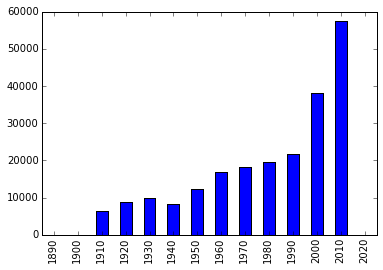

In [22]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

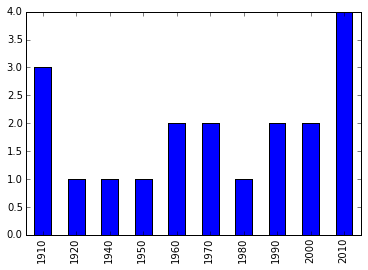

In [23]:
h = titles[titles.title == 'Hamlet']
(h.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

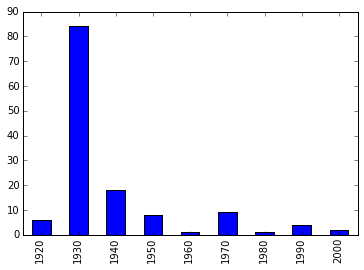

In [26]:
r = cast[cast.character == 'Rustler']
(r.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

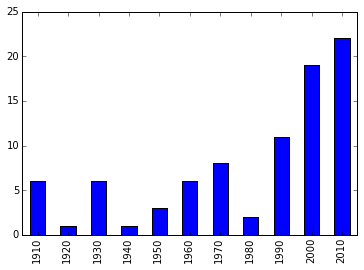

In [27]:
h_c = cast[cast.character == 'Hamlet']
(h_c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [30]:
common_characters = cast.character.value_counts()
common_characters.head(11)

Himself        18691
Dancer         11409
Extra           9625
Reporter        7768
Doctor          7022
Policeman       6613
Student         6579
Nurse           6277
Bartender       6251
Party Guest     6238
Minor Role      6062
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [38]:
herself = cast[cast.character == 'Herself']
herself = herself.name.value_counts()
herself.head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Joan Rivers             7
Mary Jo Pehl            7
Lili?n Garc?a           6
Sally Jessy Raphael     5
Kareena Kapoor          5
Juhi Chawla             5
Bunny Yeager            5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [ ]:
himself = cast[cast.character == 'Himself']
himself = himself.name.value_counts()
himself.head(10)

### Which actors or actresses appeared in the most movies in the year 1945?

In [40]:
_1945_ = cast[cast.year == 1945]
most = _1945_.name.value_counts()
most.head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       29
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Larry Steers        25
Franklyn Farnum     25
Pierre Watkin       24
Charles Sullivan    24
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [41]:
_1985_ = cast[cast.year == 1985]
most = _1985_.name.value_counts()
most.head(10)

Mammootty           20
Shakti Kapoor       19
Sukumari            18
Lou Scheimer        15
Aruna Irani         14
Mohanlal            14
Raj Babbar          14
Rajesh Khanna       13
Deven Verma         13
Satyendra Kapoor    12
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

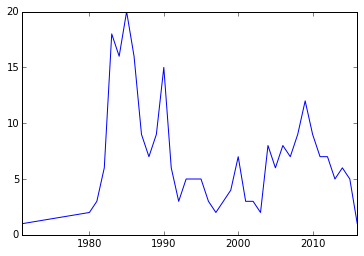

In [46]:
mammootty = cast[cast.name == 'Mammootty']
mammootty.year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [50]:
patron = cast[cast.character.str.startswith('Patron in ')]
patron.character.value_counts()

Patron in Frisky Rabbit           16
Patron in Chinese Restaurant       9
Patron in the Coffee House         9
Patron in Billiard Parlor          5
Patron in Bar                      4
Patron in Club                     3
Patron in restaurant               3
Patron in cabaret                  3
Patron in Restaurant               3
Patron in booth                    2
Patron in Audience                 2
Patron in Quiet Bar                2
Patron in Coffee Shop              2
Patron in Hall #1                  1
Patron in Children's Nightclub     1
Patron in Cafe                     1
Patron in Art Gallery              1
Patron in Store                    1
Patron in video store              1
Patron in airport                  1
Patron in Cinema                   1
Patron in Pizza Place              1
Patron in Black                    1
Patron in Hooly's                  1
Patron in the bar                  1
Patron in Diner                    1
Patron in Pool Hall                1
P

### What are the 10 most frequent roles that start with the word "Science"?

In [52]:
patron = cast[cast.character.str.startswith('Science')]
top10 = patron.character.value_counts()
top10.head(10)

Science Teacher         55
Science Student          9
Science Fair Student     9
Science Club Member      5
Science Reporter         5
Science Fair Judge       5
Science Kid              4
Science Promo Cadet      4
Science Officer          3
Science teacher          3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

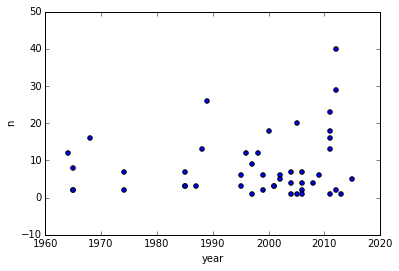

In [55]:
judi = cast[cast.name == 'Judi Dench']
judi.plot(x='year',y='n',kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

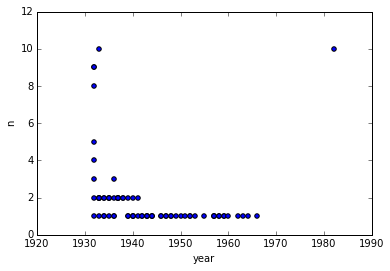

In [56]:
cary = cast[cast.name == 'Cary Grant']
cary.plot(x='year',y='n',kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

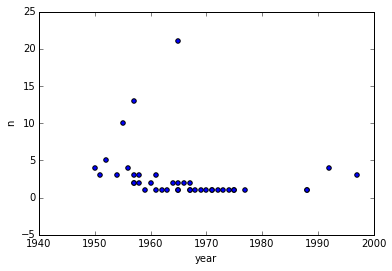

In [57]:
sid = cast[cast.name == 'Sidney Poitier']
sid.plot(x='year',y='n',kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

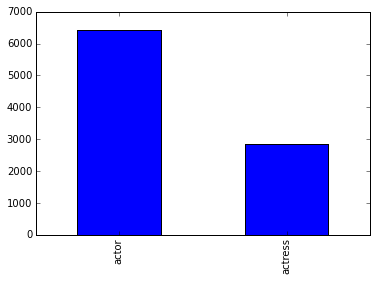

In [58]:
lead = cast[(cast.n == 1) & (cast.year <= 1959) & (cast.year >= 1950)]
(lead.type).value_counts().sort_index().plot(kind='bar')

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

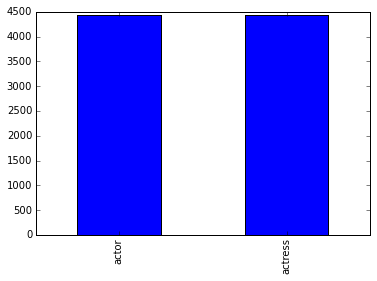

In [59]:
support = cast[(cast.n == 2) & (cast.year <= 1959) & (cast.year >= 1950)]
(support.type).value_counts().sort_index().plot(kind='bar')